In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

Defining function to estimate phase offset assuming matching cables and another to determine the error with our measured values

In [2]:
def phase_estimator(len_diff, freq, vf):
    return (2*np.pi*len_diff*freq)/(vf*3e8)

def get_phase_error(phases, signal_freqs, carrier_freq, len_diff, vf):
    
    summed_freqs = carrier_freq + signal_freqs

    phase_est = phase_estimator(len_diff, summed_freqs, vf)
    phase_wrapped = (phase_est + np.pi) % (2 * np.pi) - np.pi

    phase_err = phases - phase_wrapped 

    return phase_err

Ditto, though we assume mismatching cable velocity factors

In [3]:
def phase_estimator_mismatch(freq, len1, len2, vf1, vf2):
    return (2*np.pi*len1*freq)/(vf1*3e8) - (2*np.pi*len2*freq)/(vf2*3e8)

def get_phase_error_mismatch(phases, signal_freq, carrier_freq, len1, vf1, len2, vf2):
    
    summed_freqs = carrier_freq + signal_freqs

    phase_est = phase_estimator_mismatch(summed_freqs,len1, len2, vf1, vf2)
    phase_wrapped = (phase_est + np.pi) % (2 * np.pi) - np.pi

    phase_err = phases - phase_wrapped 

    return phase_err

Setting up our test frequencies and our measured results

In [4]:
signal_freqs = np.array([500000, 1000000, 1500000, 2000000, 2500000])

phases_450_test = np.array([3.1, 3.0, 2.7, 2.4, 2.2])
phases_300_test = np.array([1.8, 1.6, 1.3, 1.1, 0.8])
phases_600_test = np.array([-1.7, -2.0, -2.3, -2.6, -2.9])

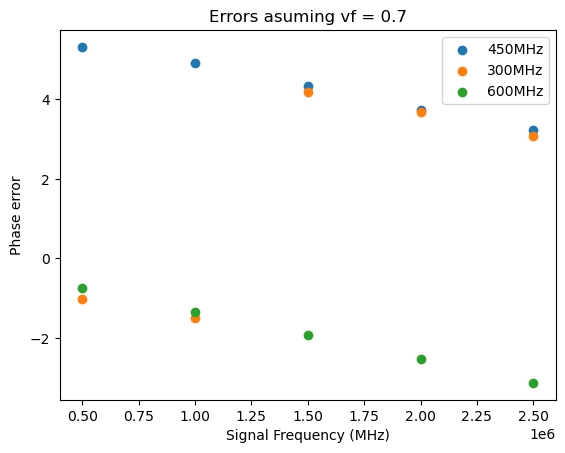

[5.31587002 4.91846591 4.32106181 3.7236577  3.2262536 ]
[-1.01067823 -1.50808233  4.17769887  3.68029477  3.08289066]
[-0.74076704 -1.33817115 -1.93557525 -2.53297936 -3.13038346]


In [16]:
errors_450 = get_phase_error(phases_450_test,signal_freqs, 450e6, 19.88, 0.7)
errors_300 = get_phase_error(phases_300_test,signal_freqs, 300e6, 19.88, 0.7)
errors_600 = get_phase_error(phases_600_test,signal_freqs, 600e6, 19.88, 0.7)

f, ax = plt.subplots()

ax.scatter(signal_freqs, errors_450, label = '450MHz')
ax.scatter(signal_freqs, errors_300, label = '300MHz')
ax.scatter(signal_freqs, errors_600, label = '600MHz')

ax.set_xlabel('Signal Frequency (MHz)')
ax.set_ylabel('Phase error')

plt.title('Errors asuming vf = 0.7')

plt.legend()
plt.show()

print(errors_450)
print(errors_300)
print(errors_600)

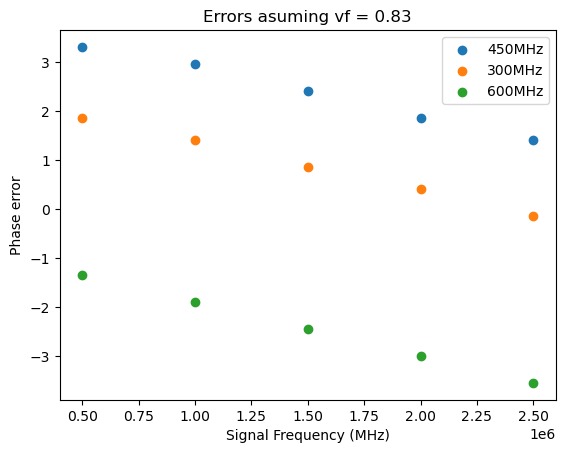

[3.30338343 2.95256069 2.40173795 1.85091521 1.40009247]
[ 1.85198137  1.40115863  0.85033589  0.39951316 -0.15130958]
[-1.34521452 -1.89603726 -2.44685999 -2.99768273 -3.54850547]


In [7]:
errors_450 = get_phase_error(phases_450_test,signal_freqs, 450e6, 19.88, 0.83)
errors_300 = get_phase_error(phases_300_test,signal_freqs, 300e6, 19.88, 0.83)
errors_600 = get_phase_error(phases_600_test,signal_freqs, 600e6, 19.88, 0.83)

f, ax = plt.subplots()

ax.scatter(signal_freqs, errors_450, label = '450MHz')
ax.scatter(signal_freqs, errors_300, label = '300MHz')
ax.scatter(signal_freqs, errors_600, label = '600MHz')

ax.set_xlabel('Signal Frequency (MHz)')
ax.set_ylabel('Phase error')

plt.title('Errors asuming vf = 0.83')

plt.legend()
plt.show()

print(errors_450)
print(errors_300)
print(errors_600)

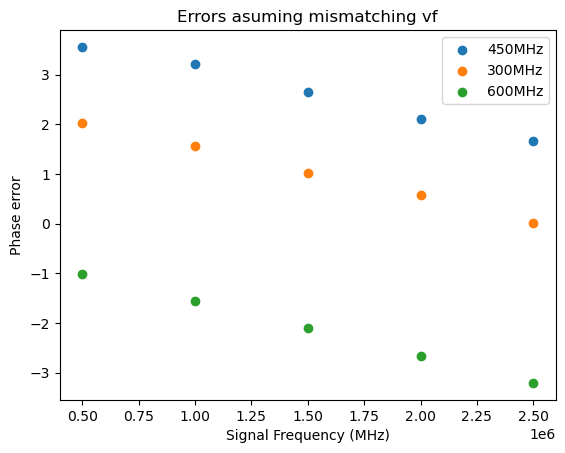

[3.55672232 3.20618076 2.6556392  2.10509763 1.65455607]
[2.0209677  1.57042613 1.01988457 0.569343   0.01880144]
[-1.00752305 -1.55806461 -2.10860617 -2.65914774 -3.2096893 ]


In [8]:
errors_450_mismatch = get_phase_error_mismatch(phases_450_test, signal_freqs, 450e6, 20, 0.83, 0.12, 0.7)
errors_300_mismatch = get_phase_error_mismatch(phases_300_test, signal_freqs, 300e6, 20, 0.83, 0.12, 0.7)
errors_600_mismatch = get_phase_error_mismatch(phases_600_test, signal_freqs, 600e6, 20, 0.83, 0.12, 0.7)

f, ax = plt.subplots()

ax.scatter(signal_freqs, errors_450_mismatch, label = '450MHz')
ax.scatter(signal_freqs, errors_300_mismatch, label = '300MHz')
ax.scatter(signal_freqs, errors_600_mismatch, label = '600MHz')

ax.set_xlabel('Signal Frequency (MHz)')
ax.set_ylabel('Phase error')

plt.title('Errors asuming mismatching vf')

plt.legend()
plt.show()

print(errors_450_mismatch)
print(errors_300_mismatch)
print(errors_600_mismatch)

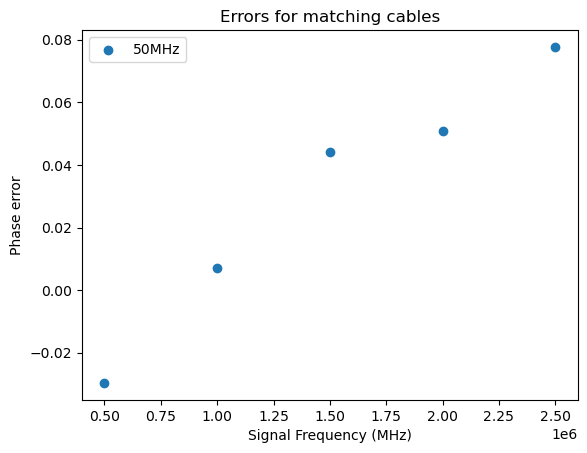

[-0.02964169  0.00719354  0.04402877  0.050864    0.07769923]


In [12]:
signal_freqs2 = np.array([500000, 1000000, 2000000, 3000000, 4000000])
phases_50_test = np.array([1.30, 1.35, 1.40, 1.42, 1.46])

errors_50_mismatch = get_phase_error(phases_50_test, signal_freqs, 50e6, 0.88, 0.7)

f, ax = plt.subplots()

ax.scatter(signal_freqs, errors_50_mismatch, label = '50MHz')


ax.set_xlabel('Signal Frequency (MHz)')
ax.set_ylabel('Phase error')

plt.title('Errors for matching cables')

plt.legend()
plt.show()

print(errors_50_mismatch)